### Bitcoin Price Analysis
Source for data: https://min-api.cryptocompare.com/


### If you'd like to contribute

#### **Bitcoin public address**</p>
**`bc1qlwelaz6jsupjrfpuk0327uazxrregvupse99rz`**
   
[Or use Lightning through Tippin.me](https://tippin.me/@alphaazeta)

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests

# Chart libraries + settings
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings

In [20]:
# Load Bitcoin Prices into a dataframe
# Ticker is customizable
ticker = "BTC"
# Cryptocompare URL and fiels
base_url = 'https://min-api.cryptocompare.com/data/histoday'
ticker_field = 'fsym'
field_dict = {'tsym': 'USD','allData': 'true'}
# Convert the field dict into a url encoded string
url_args = "&" + urllib.parse.urlencode(field_dict)
ticker = ticker.upper()
globalURL = (base_url + "?" + ticker_field + "=" + ticker + url_args)


In [21]:
# Request the data
resp = requests.get(url=globalURL)
data = resp.json()
data["Response"]

'Success'

In [54]:
# Parse the JSON into a Pandas DataFrame
try:
    df = pd.DataFrame.from_dict(data['Data'])
    df = df.rename(columns={'time': 'date'})
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df_save = df[['close', 'open', 'high', 'low']]
except Exception as e:
    self.errors.append(e)
    df_save = None

In [55]:
# Include percentage change and other columns 
df = df_save
df['change'] = df['close'].pct_change()

In [56]:
# Show Log chart of data

<AxesSubplot:title={'center':'Historical Chart (BTC) - Log Y axis'}, xlabel='date'>

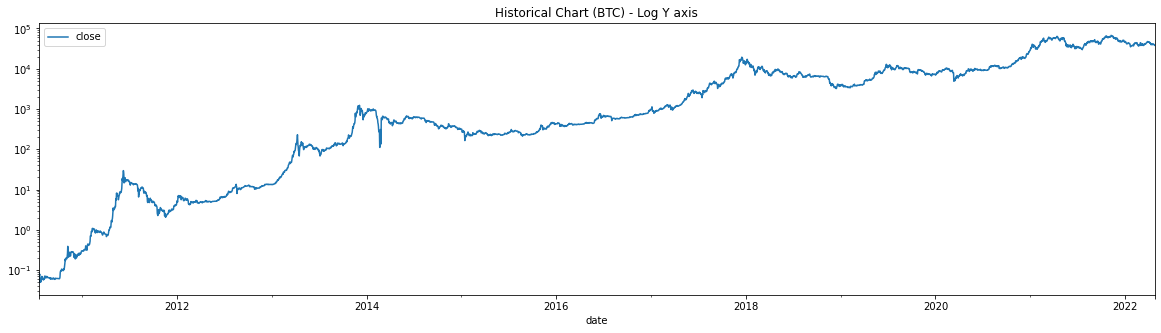

In [57]:
df[['close']].plot(kind='line', 
                   logy=True, 
                   figsize=(20,5), 
                   title='Historical Chart ('+ticker.upper()+') - Log Y axis')

In [96]:
# Calculate how many days it took for the current price to never be seen again
# Let's call this the HODLNAUT index - "We will never see Bitcoin price below xxx again"
from scipy.signal import argrelextrema
max_date = df.index.max()
min_date = df.index.min()
df.sort_index(inplace=True, ascending=True)
df['max_from_here'] = np.nan
df['lower_than_current'] = np.nan
df['never_again'] = False
df_from_here['close'] = df_from_here['close'].astype(np.float64)
for index, row in df.iterrows():
        df_from_here = df.loc[index:max_date]
        df_past_here = df.loc[min_date:index]
        close = row['close']
        # Count lower occurences of today's price from here
        lower_days = df_from_here['close'][df_from_here['close'] < close].count()
        df.loc[index,'max_from_here'] = df_from_here['close'].max()
        df.loc[index,'lower_than_current'] = lower_days
        if lower_days == 0:
            df.loc[index,'never_again'] = True


df

,close,open,high,low,change,max_from_here,lower_than_current,never_again
date,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,NaN,67549.14,0.0,True
2010-07-18,0.08584,0.04951,0.08585,0.05941,0.733791,67549.14,81.0,False
2010-07-19,0.08080,0.08584,0.09307,0.07723,-0.058714,67549.14,80.0,False
2010-07-20,0.07474,0.08080,0.08181,0.07426,-0.075000,67549.14,78.0,False
2010-07-21,0.07921,0.07474,0.07921,0.06634,0.059807,67549.14,78.0,False
...,...,...,...,...,...,...,...,...
2022-04-21,40490.97000,41375.35000,42996.50000,39864.73000,-0.021375,40490.97,4.0,False
2022-04-22,39716.04000,40490.97000,40794.73000,39190.22000,-0.019138,39716.04,3.0,False
2022-04-23,39445.97000,39716.04000,39988.54000,39305.67000,-0.006800,39466.26,1.0,False


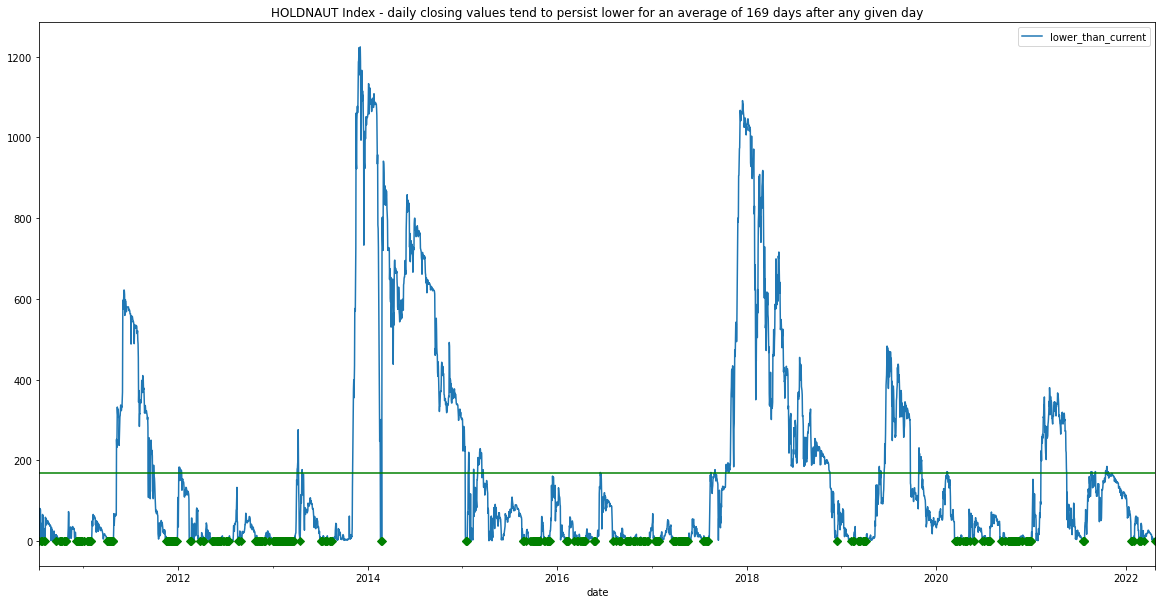

'Total number of days: 4301'

'Never Again count: 493'

In [109]:
avg_lower = df['lower_than_current'].mean()

df[['lower_than_current']].plot(
                    kind='line', 
                    figsize=(20,10), 
                    title=f'HOLDNAUT Index - daily closing values tend to persist lower for an average of {int(avg_lower)} days after any given day')

plt.axhline(avg_lower, color="green")

for index, row in df.iterrows():
    if row['never_again'] is True:
        x0 = index
        y0 = 0
        plt.plot(x0, y0, '-gD')

plt.show()

display(f"Total number of days: {df['close'].count()}")
display(f"Never Again count: {df.never_again.sum()}")ß

In [8]:
def range_calc(days):
    # Check the range for this period between the intraday high and intraday low
    df['max_'+str(days)] = df['high'].rolling(days).max()
    df['min_'+str(days)] = df['low'].rolling(days).min()
    df['chg_'+str(days)] = (df['close'] / df['max_'+str(days)]) - 1

d = 3
range_calc(d)

In [9]:
# Latest % value for d days
last_chg = df['chg_'+str(d)][-1]
print ("Last Range = " + str(last_chg * 100) + "%")
print ("High = " +  str(df['max_'+str(d)][-1]))
print ("Low = " +  str(df['min_'+str(d)][-1]))
print ("Last = " +  str(df['close'][-1]))


Last Range = -3.818293941214146%
High = 39988.54
Low = 38234.7
Last = 38461.66


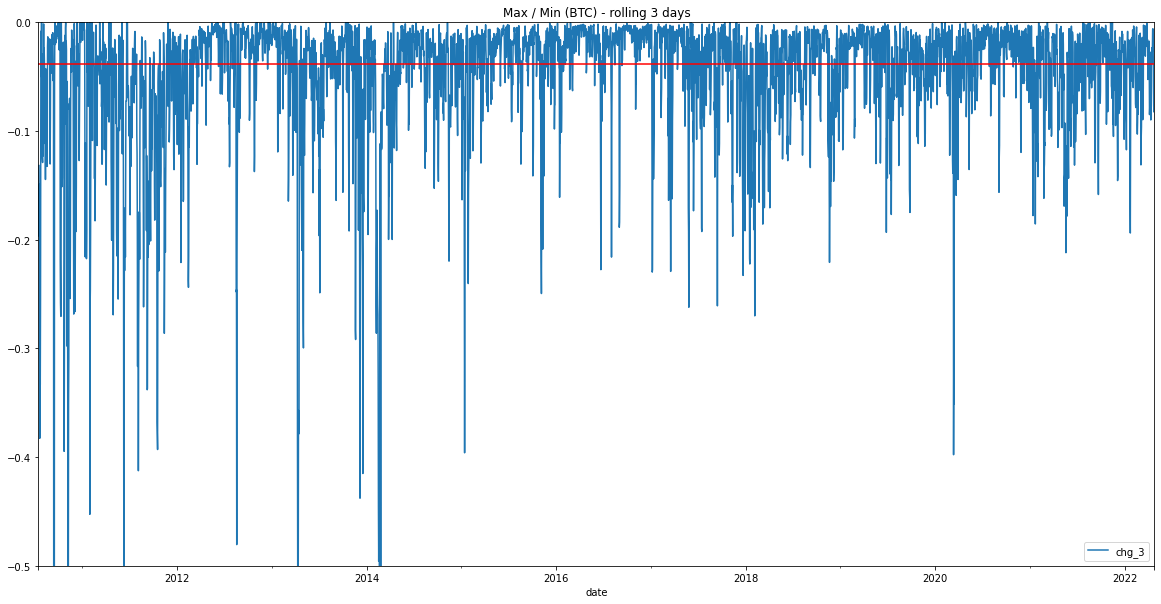

In [10]:
df[['chg_'+str(d)]].plot(
                    kind='line', 
                    figsize=(20,10), 
                    title='Max / Min ('+ticker.upper()+') - rolling '+str(d)+' days')

axes = plt.gca()
axes.set_ylim([-0.5,0])
plt.axhline(df['chg_'+str(d)][-1], color="red")
plt.show()

In [11]:
# Number of total days
total = df.count().close
total

4301

In [12]:
# How many where lower the current level?
df_lower = df.loc[df['chg_'+str(d)] < last_chg]
lower = df_lower.count().close
print ("Number of instances where the range was lower = " + str(lower))
print ("Percentage of total = " + str(lower / total * 100) + "%")

Number of instances where the range was lower = 1721
Percentage of total = 40.01395024412927%


In [13]:
# Filter the list for points that are in consecutive days
df_lower['n_days'] = df_lower.index
df_lower['diff'] = (df_lower['n_days'] - df_lower['n_days'].shift()).dt.days
df_lower = df_lower[df_lower['diff'] != 1]

<AxesSubplot:xlabel='date'>

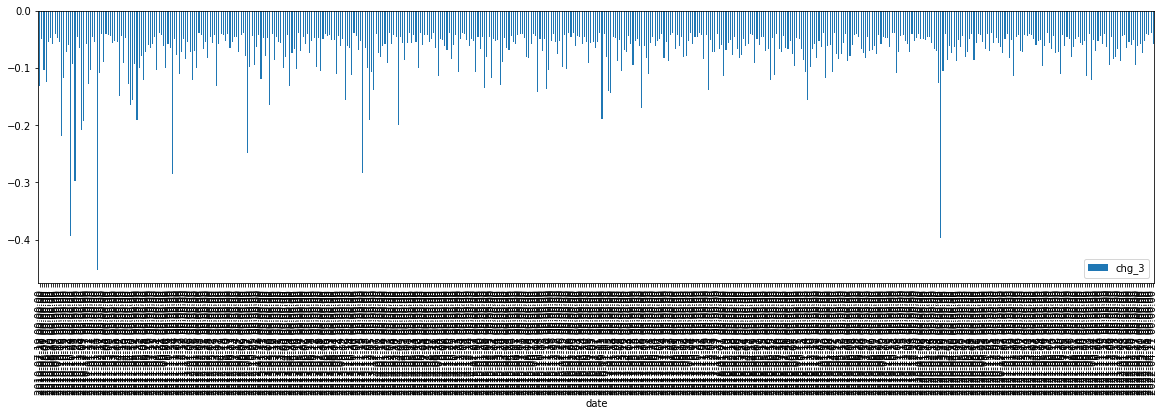

In [14]:
# Histogram of dates and returns
df_lower[['chg_'+str(d)]].plot(
                    kind='bar', 
                    figsize=(20,5))
                    

In [15]:
def find_price(date):
    try:
        price = df.loc[date]['close']
    except Exception as e:
        return None
    return (price)
    
days_list = [10, 30, 90, 365]
cols = ['close']
for element in days_list:
    df_lower['date_after_' + str(element) + '_days'] = df_lower['n_days'] + pd.DateOffset(element)
    df_lower['price_after_' + str(element) + '_days'] = df_lower['date_after_' + str(element) + '_days'].apply(find_price)
    cols.append('price_after_' + str(element) + '_days')
    df_lower['return_after_' + str(element) + '_days'] = (df_lower['price_after_' + str(element) + '_days'] / df_lower['close']) - 1
    cols.append('return_after_' + str(element) + '_days')


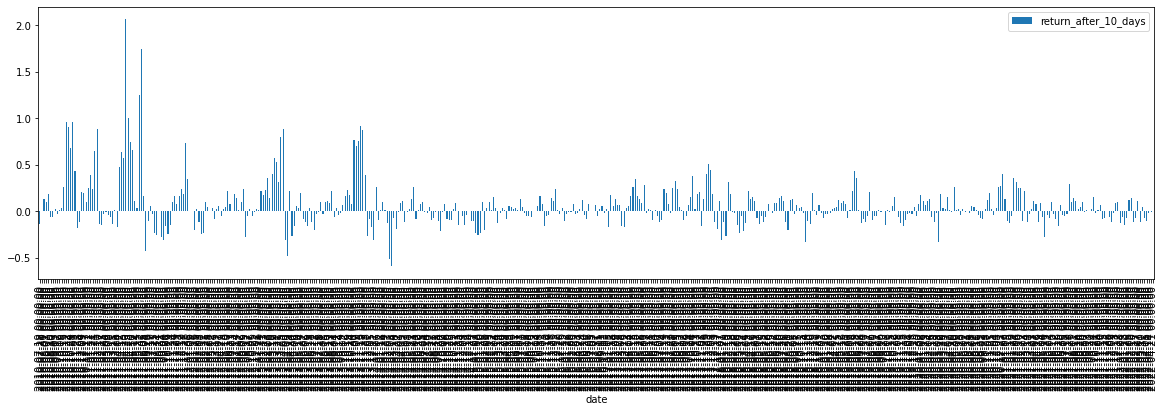

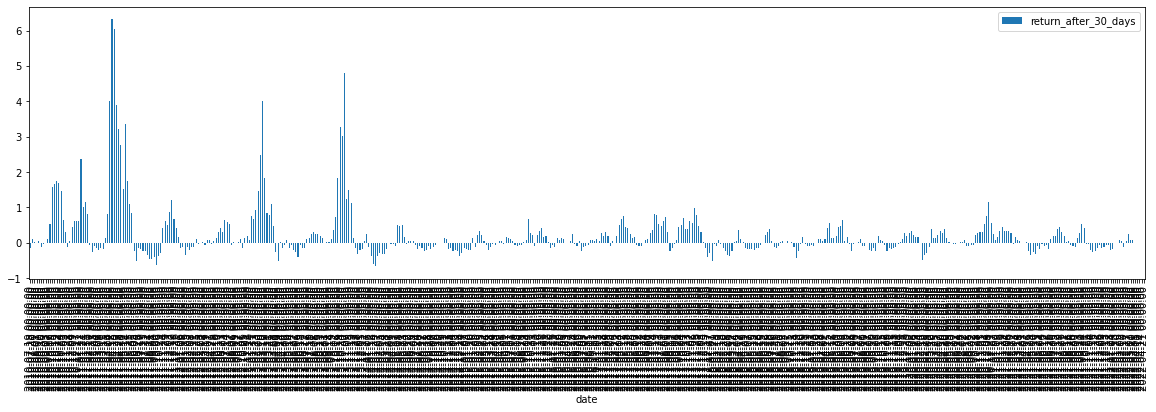

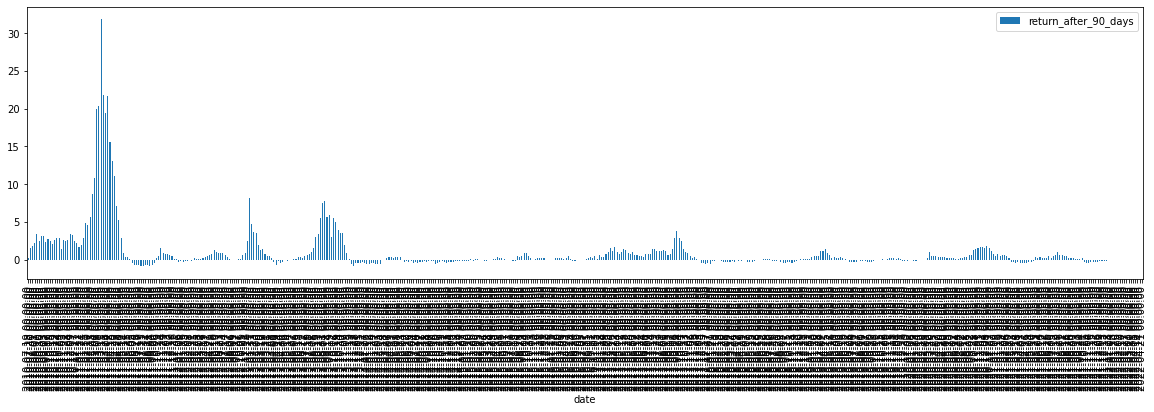

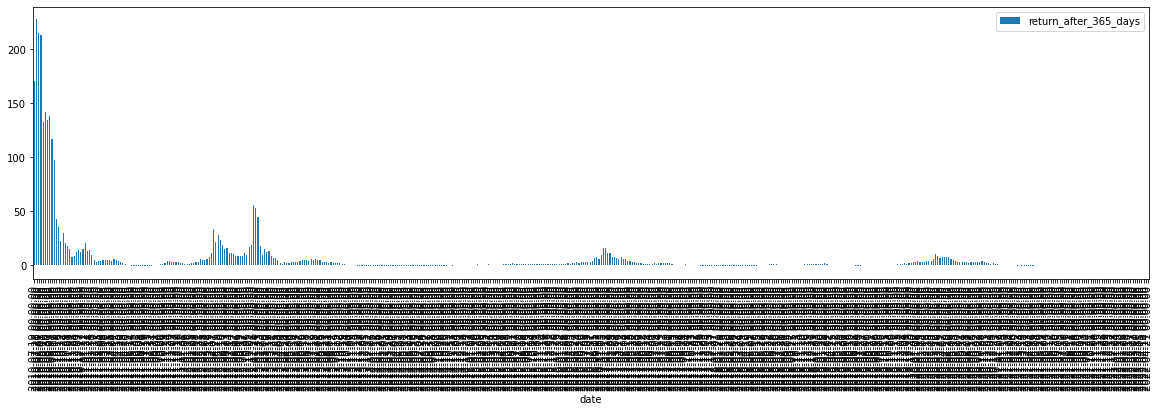

In [16]:
# Average results
for element in days_list:
    df_lower[['return_after_'+str(element)+'_days']].plot(
                    kind='bar', 
                    figsize=(20,5))


In [17]:
# Summary for each date range
for element in days_list:
    print ('-------------------------------------------------------------')
    print ('Results for ' + str(element) + ' days')
    print ('average return = ' + str(df_lower[['return_after_'+str(element)+'_days']].mean()[0] * 100) + '%')
    print ('min return = ' + str(df_lower[['return_after_'+str(element)+'_days']].min()[0] * 100) + '%')
    print ('max return = ' + str(df_lower[['return_after_'+str(element)+'_days']].max()[0] * 100) + '%')

-------------------------------------------------------------
Results for 10 days
average return = 5.964733014137859%
min return = -58.97603148631318%
max return = 206.47985989492122%
-------------------------------------------------------------
Results for 30 days
average return = 21.578458065035655%
min return = -66.15896568654192%
max return = 632.5581395348837%
-------------------------------------------------------------
Results for 90 days
average return = 93.34024799777592%
min return = -86.5993993993994%
max return = 3186.3636363636365%
-------------------------------------------------------------
Results for 365 days
average return = 683.9936192784002%
min return = -81.38967811846504%
max return = 22803.225806451614%
